# SVM Example
Doing Data Science

Roderick Perez Altamar, Ph.D.

Nov, 5th, 2020

In [2]:
# Step 0: Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA 
import math
from sklearn.cluster import KMeans
from IPython.display import Image

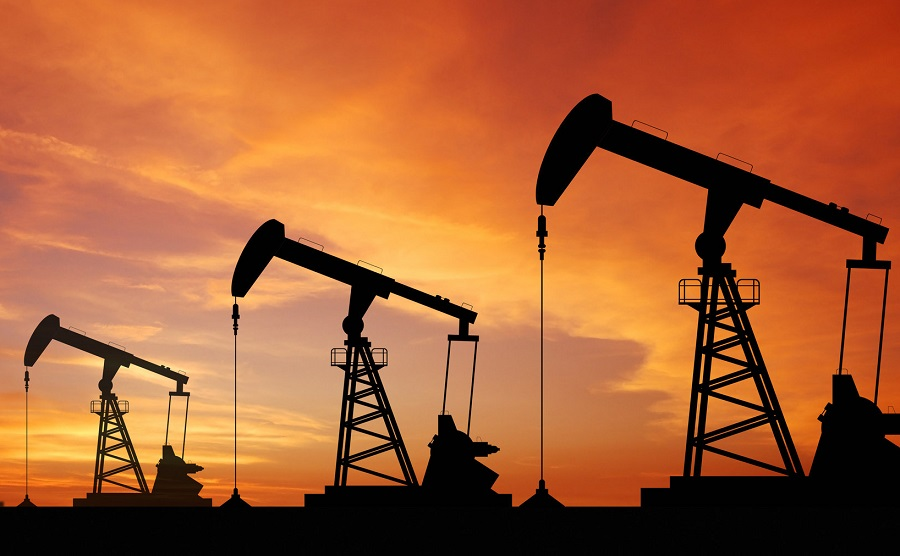

In [3]:
Image(filename = "C:/Users/RODERICK/Documents/UniversityWien/W2020/Mathematics of Data Science/images/oil_gas.jpg")

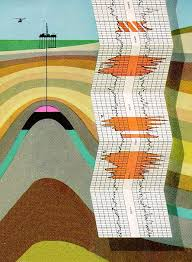

In [4]:
Image(filename = "C:/Users/RODERICK/Documents/UniversityWien/W2020/Mathematics of Data Science/images/well_log.jpg")

In [2]:
# Step 1: Import the model
data = pd.read_csv('C:/Users/RODERICK/Documents/Python/Geology_Geophysics/MachineLearning/well_CivGeo.csv')
data_sc = pd.DataFrame(preprocessing.scale(data), columns =['TIPO', 'LOG1', 'LOG2', 'LOG3'])

In [3]:
# Step 2: Visualize dataset
data_sc

,TIPO,LOG1,LOG2,LOG3
0,-1.382679,-0.240214,-0.811049,-0.891681
1,-1.382679,-0.390437,-0.722573,-0.974484
2,-1.382679,-0.424493,-0.502935,-0.997236
3,-1.382679,-0.224972,-0.151406,-0.997236
4,-1.382679,-0.154190,0.015716,-0.954286
...,...,...,...,...
389,1.345746,0.300471,-1.138277,-0.091452
390,1.345746,0.339218,-1.138277,-0.101137
391,1.345746,0.374169,-1.138277,-0.097939
392,1.345746,0.367760,-1.138277,-0.099804


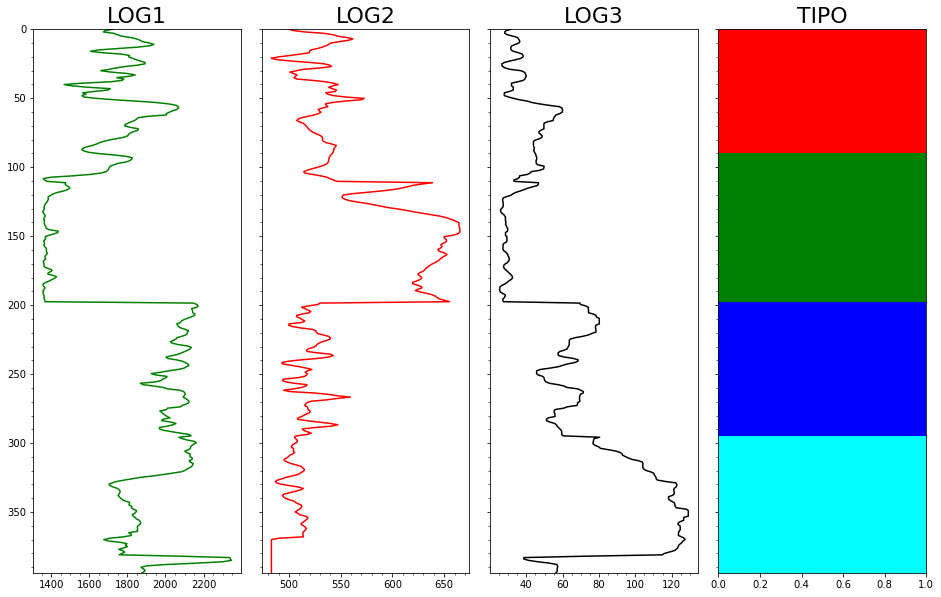

In [4]:
# Step 3: Plot well log data

cmap = ListedColormap(['red', 'green', 'blue', 'cyan'])
depth = np.linspace(0, len(data['TIPO']),len(data['TIPO']))

rows, cols = 1, 4

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (16, 10), sharey=True)

ax[0].plot(data['LOG1'], depth, color='green')
ax[0].minorticks_on()
ax[0].set_title('LOG1', fontsize='22')

ax[1].plot(data['LOG2'], depth, color='red')
ax[1].minorticks_on()
ax[1].set_title('LOG2', fontsize='22')

ax[2].plot(data['LOG3'], depth, color='black')
ax[2].minorticks_on()
ax[2].set_title('LOG3', fontsize='22')

F_orig = np.vstack((data['TIPO'], data['TIPO'])).T

ax[3].imshow(F_orig, aspect='auto', cmap=cmap, extent=[0,1,max(depth), 0])
#ax[3].minorticks_on()
ax[3].set_title('TIPO', fontsize='22')

plt.subplots_adjust(wspace=0.1)
plt.show()

In [5]:
data.groupby('TIPO').size()

TIPO
0     90
1    108
2     97
3     99
dtype: int64

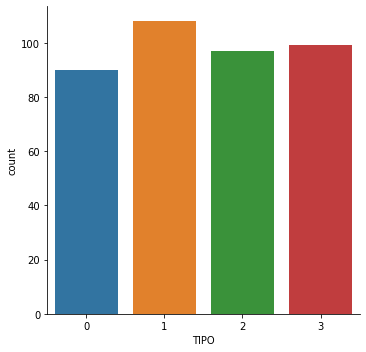

In [6]:
# Step 4: Visualize group
sns.catplot('TIPO',data=data,kind="count")

# Principal Component Analysis (PCA)

In [7]:
# Step 5: Delete column 'TIPO' from the original dataset

data_PCA = data_sc.drop(['TIPO'],1)
data_PCA

,LOG1,LOG2,LOG3
0,-0.240214,-0.811049,-0.891681
1,-0.390437,-0.722573,-0.974484
2,-0.424493,-0.502935,-0.997236
3,-0.224972,-0.151406,-0.997236
4,-0.154190,0.015716,-0.954286
...,...,...,...
389,0.300471,-1.138277,-0.091452
390,0.339218,-1.138277,-0.101137
391,0.374169,-1.138277,-0.097939
392,0.367760,-1.138277,-0.099804


In [8]:
# Step 6: Define PCA

pca = PCA(n_components=2, svd_solver='full')
pca.fit(data_PCA)

PCA_results = pca.transform(data_PCA)

In [21]:
# # Step 7: Verify Size datasets
print('Original Dataset:', data.shape)

print('PCA Dataset:', PCA_results.shape)

Original Dataset: (394, 4)
PCA Dataset: (394, 2)


We can use the explained_variance_ratio_ method of our principal component analysis object to see how much of the variance is explained by each of our principal component vectors.

In [11]:
pca.explained_variance_ratio_

array([0.74627668, 0.1818298 ])

So, only two main components can explain almost 92.8% (74.63% + 18.18%) of the variation of these 2 characteristics.

**Interpreting the components**:

We can access the correlations between the components and the original variables using the components_ method of our PCA () object.

The interpretation of these is based on finding the most highly correlated components:

In [12]:
pca.components_.shape

(2, 3)

In [13]:
components = pd.DataFrame(pca.components_, columns = data_PCA.columns)
components

,LOG1,LOG2,LOG3
0,-0.586259,0.616751,-0.525280
1,0.519372,-0.211477,-0.827968


We can do some math to find out what the most important characteristics are.

In [14]:
def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print ("Features by importance:\n", important_features)

important_features = get_important_features(PCA_results, pca.components_, data_PCA.columns.values)

Features by importance:
 [(2.1575950704623867, 'LOG3'), (1.9520658496269254, 'LOG1'), (1.8312371227866882, 'LOG2')]


We see that the most important features for this PCA are * LOG3 *, * LOG1 *, and * LOG2 *, as we saw when examining the `components_` above.

By plotting these lengths, we can see this visually:

In [15]:
def draw_vectors(transformed_features, components_, columns):
    """
    This funtion will project your *original* features
    onto your principal component feature-space, so that you can
    visualize how "important" each one was in the
    multi-dimensional scaling
    """

    num_columns = len(columns)
    #num_columns = 3

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ax = plt.axes()

    for i in range(num_columns):
    # Use an arrow to project each original feature as a
    # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=1)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

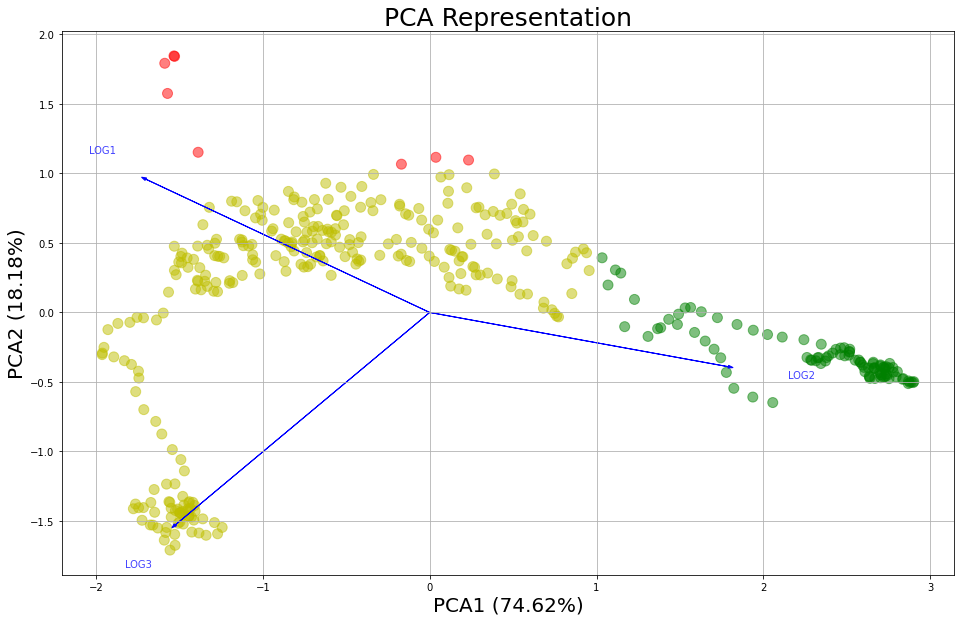

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))

ax = draw_vectors(PCA_results, pca.components_, data_PCA.columns.values)
T_df = pd.DataFrame(PCA_results)
T_df.columns = ['component1', 'component2']

T_df['color'] = 'y'
T_df.loc[T_df['component1'] > 1, 'color'] = 'g'
T_df.loc[T_df['component2'] > 1, 'color'] = 'r'

plt.xlabel('PCA1 (74.62%)', fontsize=20)
plt.ylabel('PCA2 (18.18%)', fontsize=20)
plt.scatter(T_df['component1'], T_df['component2'], color=T_df['color'], alpha=0.5, s = 100)
plt.title('PCA Representation', fontsize=25)
plt.grid()
plt.show()

## Combining the results with K-Means

In [17]:
data_PCA_Kmeans = T_df
del data_PCA_Kmeans['color']

In [18]:
kmeans_PCA = KMeans(n_clusters=4)  # Change numbers of clusters
kmeans_PCA.fit(data_PCA_Kmeans)

KMeans(n_clusters=4)

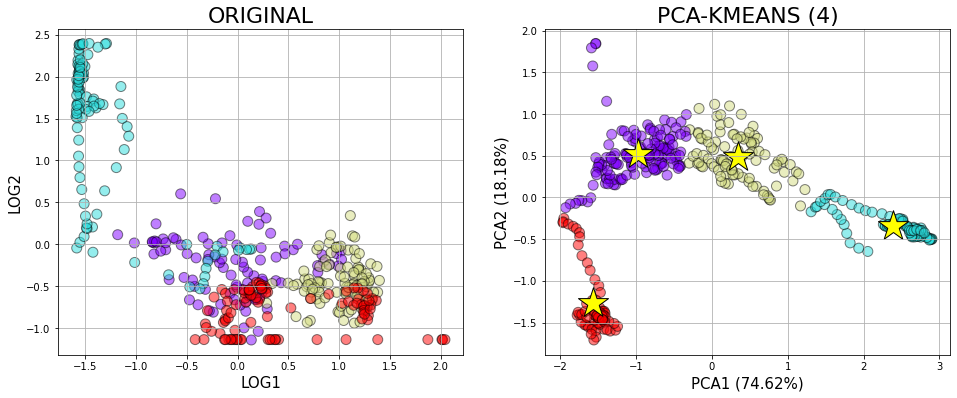

In [19]:
labels = kmeans_PCA.labels_

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

centroids_PCA = kmeans_PCA.cluster_centers_

# Subplot 1
ax[0].scatter(data_sc.iloc[:,1],data_sc.iloc[:,2],
            c=data_sc.iloc[:,0], cmap=plt.cm.rainbow, s = 100, edgecolor = 'black', alpha = 0.5)
ax[0].set_xlabel('LOG1', fontsize=15)
ax[0].set_ylabel('LOG2', fontsize=15)
ax[0].set_title('ORIGINAL', fontsize='22')
ax[0].grid()

# Subplot 2
ax[1].scatter(data_PCA_Kmeans.iloc[:,0],data_PCA_Kmeans.iloc[:,1],
            c=labels, cmap=plt.cm.rainbow, s = 100, edgecolor = 'black', alpha = 0.5)
ax[1].set_title('PCA-KMEANS (4)', fontsize = 22)
ax[1].set_xlabel('PCA1 (74.62%)', fontsize = 15)
ax[1].set_ylabel('PCA2 (18.18%)', fontsize = 15)
ax[1].scatter(centroids_PCA[:, 0], centroids_PCA[:, 1], marker='*', c='yellow', edgecolor = 'black', s=1000)

ax[1].grid()

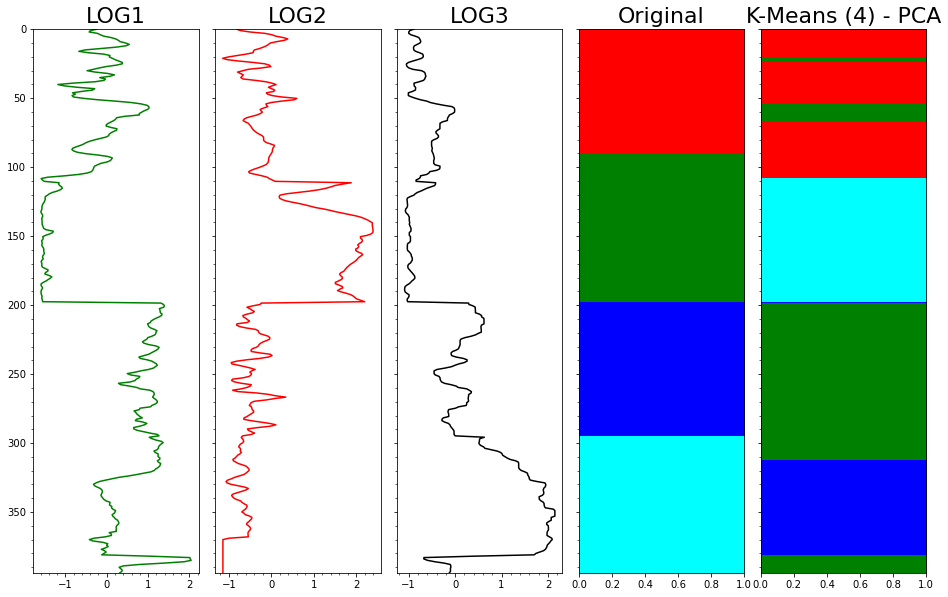

In [20]:
relabel = np.choose(kmeans_PCA.labels_,[1,3,0,2]).astype(np.int64)

rows, cols = 1, 5

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (16, 10), sharey=True)
cmap = ListedColormap(['red', 'green', 'blue', 'cyan'])
depth = np.linspace(0, len(data['TIPO']),len(data['TIPO']))

ax[0].plot(data_sc['LOG1'], depth, color='green')
ax[0].minorticks_on()
ax[0].set_title('LOG1', fontsize='22')

ax[1].plot(data_sc['LOG2'], depth, color='red')
ax[1].minorticks_on()
ax[1].set_title('LOG2', fontsize='22')

ax[2].plot(data_sc['LOG3'], depth, color='black')
ax[2].minorticks_on()
ax[2].set_title('LOG3', fontsize='22')

F_orig = np.vstack((data_sc['TIPO'], data_sc['TIPO'])).T

ax[3].imshow(F_orig, aspect='auto', cmap=cmap, extent=[0,1,max(depth), 0])
#ax[3].minorticks_on()
ax[3].set_title('Original', fontsize='22')

F_PCA_KNN = np.vstack((relabel, relabel)).T

ax[4].imshow(F_PCA_KNN, aspect='auto', cmap=cmap, extent=[0,1,max(depth), 0])
ax[4].set_title('K-Means (4) - PCA', fontsize='22')

plt.subplots_adjust(wspace=0.1)
plt.show()